In [17]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 59 kB/s 
     |████████████████████████████████| 47.7 MB 1.5 MB/s 


In [18]:
!pip install googletrans

     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 1.3 MB 13.4 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 65 kB 4.3 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=89c99781b20720dc1eb6157a743aba917c4749d798b8322aee8d919fe5bd2d7e
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [19]:
!pip install gTTS

In [20]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2022-02-05 11:21:48--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.24.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.24.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg’

mk1jX.jpg           100%[===================>]  44.12K  --.-KB/s    in 0.008s  

2022-02-05 11:21:48 (5.63 MB/s) - ‘mk1jX.jpg’ saved [45178/45178]



In [21]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [22]:
reader = easyocr.Reader(['ta'])
translator = Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


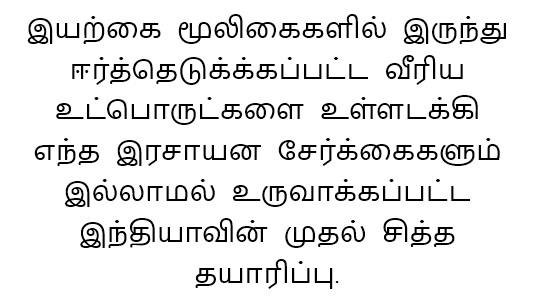

In [33]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open('/content/mk1jX.jpg')
im

In [32]:
bounds = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-.')
bounds

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.6913254394264913),
 ([[49, 29], [489, 29], [489, 110], [49, 110]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.6646166915188049),
 ([[38, 77], [324, 77], [324, 146], [38, 146]],
  'உட்பொருட்களை ',
  0.7108491476373001),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.7778468743194383),
 ([[14, 118], [523, 118], [523, 188], [14, 188]],
  'ந்த இரசாயன சேர்க்கைகளும்',
  0.6347604670037993),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.9742949028171823),
 ([[60, 195], [478, 195], [478, 272], [60, 272]],
  'இந்தியாவின் முதல் சித்த',
  0.9620315200151218),
 ([[174, 237], [359, 237], [359, 303], [174, 303]],
  'தயாரிப்பு',
  0.5528101499909281)]

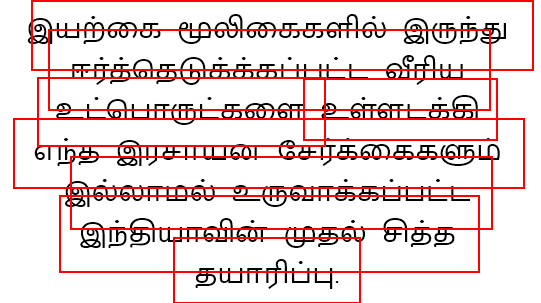

In [37]:
def draw_boxes(image, bounds, color='red',width=2):
  draw=ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3=bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(im, bounds)

In [38]:
text_list = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-.')
text_list

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.6913254394264913),
 ([[49, 29], [489, 29], [489, 110], [49, 110]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.6646166915188049),
 ([[38, 77], [324, 77], [324, 146], [38, 146]],
  'உட்பொருட்களை ',
  0.7108491476373001),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.7778468743194383),
 ([[14, 118], [523, 118], [523, 188], [14, 188]],
  'ந்த இரசாயன சேர்க்கைகளும்',
  0.6347604670037993),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.9742949028171823),
 ([[60, 195], [478, 195], [478, 272], [60, 272]],
  'இந்தியாவின் முதல் சித்த',
  0.9620315200151218),
 ([[174, 237], [359, 237], [359, 303], [174, 303]],
  'தயாரிப்பு',
  0.5528101499909281)]

In [57]:
text_list[0:10][1]

([[49, 29], [489, 29], [489, 110], [49, 110]],
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 0.6646166915188049)

In [ ]:
y

In [42]:
import torch
x = torch.tensor([[2.0,3.0, 4.0],[1,2,3]],requires_grad=True)
y = x**1.2
y.sum().backward()

print (x.grad)

tensor([[1.3784, 1.4949, 1.5834],
        [1.2000, 1.3784, 1.4949]])


In [18]:
import torch
#x1 = torch.tensor([2.0], requires_grad=True)
#x2 = torch.tensor([2.0], requires_grad=True)
x3 = torch.tensor([2.0], requires_grad=True)

#z1 = x1
#z2 = x2**2
z3 = x3**4

#z1.backward()
#z2.backward()
z3.backward()

print (x3.grad)
#print (x1.grad, '\n', x2.grad, '\n', x3.grad)

#print (z1.grad, '\n', z2.grad, '\n', z3.grad)

tensor([32.])


In [32]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2

external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

print(9*a**2 == a.grad, a.grad)
print(-2*b == b.grad, b.grad)

tensor([True, True]) tensor([36., 81.])
tensor([True, True]) tensor([-12.,  -8.])


In [49]:
a = torch.tensor([4.], requires_grad=True)
b = torch.tensor([5.], requires_grad=True)

Q = 3*a**3 - b**2

Q.backward()
print(a.grad)
print(b.grad)

tensor([144.])
tensor([-10.])


In [47]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2

Q.sum().backward()
print(a.grad)
print(b.grad)

tensor([36., 81.])
tensor([-12.,  -8.])


# OCR Check Reading 
- https://www.youtube.com/watch?v=N1AIB2buJDw

In [2]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 c

In [5]:
#!apt install llbtesseract-dev
!sudo apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [6]:
!pip install pytesseract


In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

In [12]:
ls -alrt /usr/bin/tesseract

-rwxr-xr-x 1 root root 26712 Apr  7  2018 /usr/bin/tesseract*


In [13]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
image = Image.open()
print(pytesseract.image_to_string(image, lang="eng"))

In [16]:
!wget 'https://github.com/BigPino67/Tesseract-MICR-OCR/blob/master/Tessdata/mcr.traineddata'

--2022-02-05 10:42:41--  https://github.com/BigPino67/Tesseract-MICR-OCR/blob/master/Tessdata/mcr.traineddata
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘mcr.traineddata’

mcr.traineddata         [ <=>                ] 170.59K  --.-KB/s    in 0.1s    

2022-02-05 10:42:42 (1.41 MB/s) - ‘mcr.traineddata’ saved [174689]

